# Текст и поясняющие надписи

Хорошая визуализация должна рассказывать читателю историю. В некоторых случаях это можно сделать только визуальными средствами, без дополнительного текста, но иногда небольшие текстовые подсказки и метки необходимы. Вероятно, простейший вид поясняющих надписей — метки на осях координат и их названия, но имеющиеся возможности гораздо шире. Рассмотрим на примере каких-нибудь данных, как можно их визуализировать и добавить поясняющие надписи, чтобы облегчить донесение до читателя полезной информации. Начнем с настройки блокнота для построения графиков и импорта необходимых нам функций:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

## Пример: влияние выходных дней на рождение детей в США

Данные можно скачать по адресу https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv.

In [15]:
births = pd.read_csv(r'CSV\births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]

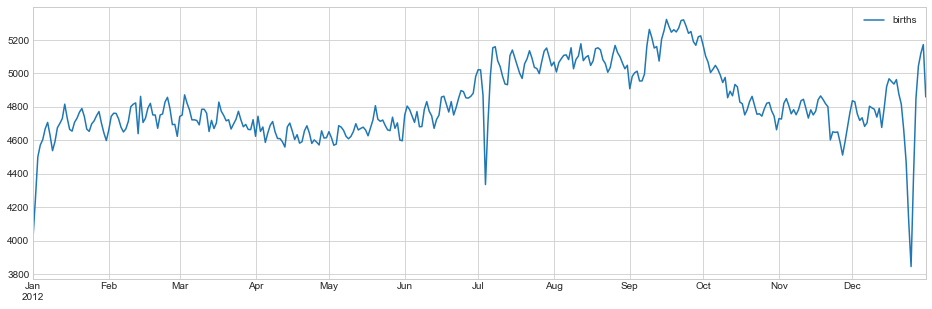

In [26]:
fig, ax = plt.subplots(figsize=(16, 5))
births_by_date.plot(ax=ax);

При работе с данными подобным образом часто бывает полезно снабдить элементы графика пояснениями для привлечения к ним внимания читателя. Это можно сделать вручную с помощью команды plt.text/ax.text, которая поместит текст в месте, соответствующем конкретным значениям координат (x, y):